In [1]:
# make a polar plot
# find the strongest predicter of 14er popularity, mayber even at a class (difficultly level)
# learn git with jupyter lab
# learn lyinting with jupyter lab
# learn about classes

# make a heatmap of county populations and landmark each 14er with hue determined by popularity bins

##### Plan ####
# make a polar plot and then apply git and lynting, afterwards try predictive modeling

In [2]:
import pandas as pd
import opendatasets as od
import os

import plotly.express as px

import plotly.graph_objects as go

### Import Data

In [3]:
kaggleDict = {"username":"treyhannam",
              "key":"8f7cad06e5ba91e63b47361cb032abc6"}

In [4]:
# od.download('https://www.kaggle.com/mikeshout/14erpeaks')

In [5]:
# os.rename('14er.csv', 'fourteener.csv')

In [6]:
df = pd.read_csv(r'fourteener.csv',encoding='ANSI', index_col='ID')

In [7]:
df.head()

,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo
ID,,,,,,,,,,,,,,,
1,Mount Elbert,Sawatch Range,14440,Y,9093,670.00,39.1178,-106.4454,Northeast Ridge,9.50,4700,Class 1,20000,25000,https://www.14ers.com/photos/mtelbert/peakphot...
2,Mount Massive,Sawatch Range,14428,Y,1961,5.06,39.1875,-106.4757,East Slopes,14.50,4500,Class 2,7000,10000,https://www.14ers.com/photos/mtmassive/peakpho...
3,Mount Harvard,Sawatch Range,14421,Y,2360,14.93,38.9244,-106.3207,South Slopes,14.00,4600,Class 2,5000,7000,https://www.14ers.com/photos/harvardgroup/peak...
4,Blanca Peak,Sangre de Cristo Range,14351,Y,5326,103.40,37.5775,-105.4856,Northwest Ridge,17.00,6500,Hard Class 2,1000,3000,https://www.14ers.com/photos/blancagroup/peakp...
5,La Plata Peak,Sawatch Range,14343,Y,1836,6.28,39.0294,-106.4729,Northwest Ridge,9.25,4500,Class 2,5000,7000,https://www.14ers.com/photos/laplatapeak/peakp...


### Categorize Variables come back and optimize

In [8]:
categorized_df = df.copy()

##### Calss Difficulty

In [9]:
categorizeClassRank = {
    'Class 1' : 1,
    'Class 2' : 2,
    'Hard Class 2' : 3,
    'Easy Class 3' : 4,
    'Class 3' : 5,
    'Hard Class 3' : 6,
    'Class 4' : 7
}

In [10]:
for k,v in categorizeClassRank.items():
    categorized_df['Difficulty'].loc[ categorized_df['Difficulty'] == k] = v

C:\Users\Trey\Desktop\Python\14er Project\14ervenv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##### Trail Distance (Distance_mi)

In [11]:
# normalize then scale to categorical variable
categorized_df['Distance_mi'] = 7*( categorized_df['Distance_mi']/ categorized_df['Distance_mi'].max() )

#### Elevation

In [12]:
categorized_df['Elevation Gain_ft'] = 7*( categorized_df['Elevation Gain_ft']/ categorized_df['Elevation Gain_ft'].max() )

##### Visitors

In [13]:
categorized_df['Traffic High'] = 7*( categorized_df['Traffic High']/ categorized_df['Traffic High'].max() )

### Plot 14ers

In [14]:
longs_peak = categorized_df.loc[ categorized_df['Mountain Peak'] == 'Longs Peak']
longs_peak

,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo
ID,,,,,,,,,,,,,,,
15,Longs Peak,Front Range,14259,Y,2940,43.6,40.255,-105.6151,Keyhole Route,3.903846,4.76,5,15000,3.5,https://www.14ers.com/photos/longspeak/peakpho...


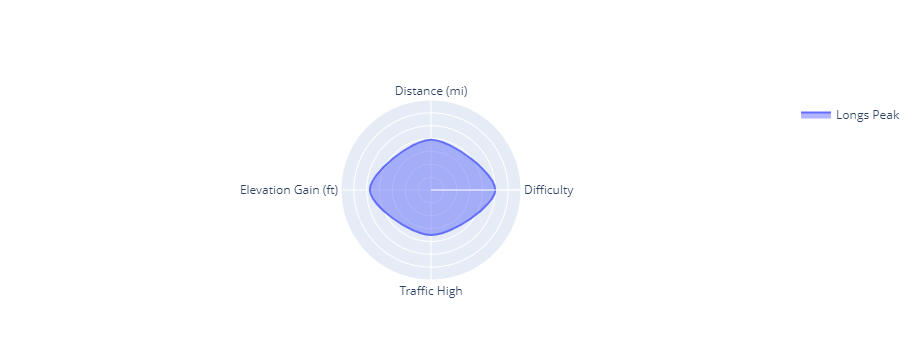

In [40]:
fig = go.Figure()


fig.add_trace(go.Scatterpolar(
        name = 'Longs Peak',
        mode = "lines",
        theta = ['Difficulty', 'Distance (mi)', 'Elevation Gain (ft)', 'Traffic High', 'Difficulty'],
        r = (longs_peak['Difficulty'].values[0], longs_peak['Distance_mi'].values[0],
                longs_peak['Elevation Gain_ft'].values[0], longs_peak['Traffic High'].values[0],
                longs_peak['Difficulty'].values[0]),
        fill = "toself",
        line =dict( shape = 'spline'),
        subplot = "polar"),
        
             )
fig.update_layout(
   showlegend = True,  
  polar=dict(
    radialaxis=dict(
    visible=True,
    range=[0, 7],
    showticklabels = False
    )))


fig.show()

In [ ]:
# next add git, do first commit. Add pylint 